In [5]:
import sys
sys.path.append('../code/functions/')
import tiffIO as io
import neuroGraphLib as ngl
from neuroGraphLib import neuroGraph
from scipy.stats import zscore
from skimage.exposure import equalize_adapthist
from scipy.ndimage import convolve
from scipy.signal import argrelmax
import synapseLib as sl
from skimage.measure import label

import matplotlib.pyplot as plt

import cv2
import time
import math
import numpy as np

In [6]:
data_0 = np.array(io.loadTiff('../data/rr46b_s0_ch1.tif'))
data_1 = np.array(io.loadTiff('../data/rr46b_s1_ch1.tif'))

In [3]:
start = time.time()
neuroGraphStack_0 = ngl.generateNeuroGraphStack(data_0)
end = time.time()
print 'Neuro Graph Generation Took: ', end - start

Growing Dendrites


/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:106: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint16.
  "%s to positive image of type %s." % (dtypeobj_in, dtypeobj))
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:136: UserWarning: Downcasting int64 to uint16 without scaling because max value 50 fits in uint16
  warn(msg)
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:136: UserWarning: Downcasting int64 to uint16 without scaling because max value 42 fits in uint16
  warn(msg)
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:136: UserWarning: Downcasting int64 to uint16 without scaling because max value 44 fits in uint16
  warn(msg)
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:136

Estimating Graph Connections. Completion:
	0.0
	0.0153846153846
	0.0307692307692
	0.0461538461538
	0.0615384615385
	0.0769230769231
	0.0923076923077
	0.107692307692
	0.123076923077
	0.138461538462
	0.153846153846
	0.169230769231
	0.184615384615
	0.2
	0.215384615385
	0.230769230769
	0.246153846154
	0.261538461538
	0.276923076923
	0.292307692308
	0.307692307692
	0.323076923077
	0.338461538462
	0.353846153846
	0.369230769231
	0.384615384615
	0.4
	0.415384615385
	0.430769230769
	0.446153846154
	0.461538461538
	0.476923076923
	0.492307692308
	0.507692307692
	0.523076923077
	0.538461538462
	0.553846153846
	0.569230769231
	0.584615384615
	0.6
	0.615384615385
	0.630769230769
	0.646153846154
	0.661538461538
	0.676923076923
	0.692307692308
	0.707692307692
	0.723076923077
	0.738461538462
	0.753846153846
	0.769230769231
	0.784615384615
	0.8
	0.815384615385
	0.830769230769
	0.846153846154
	0.861538461538
	0.876923076923
	0.892307692308
	0.907692307692
	0.923076923077
	0.938461538462
	0.953846153846

In [7]:
start = time.time()
neuroGraphStack_1 = ngl.generateNeuroGraphStack(data_1)
end = time.time()
print 'Neuro Graph Generation Took: ', end - start

Growing Dendrites


/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:106: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint16.
  "%s to positive image of type %s." % (dtypeobj_in, dtypeobj))
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:136: UserWarning: Downcasting int64 to uint16 without scaling because max value 41 fits in uint16
  warn(msg)
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:136: UserWarning: Downcasting int64 to uint16 without scaling because max value 46 fits in uint16
  warn(msg)
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:136: UserWarning: Downcasting int64 to uint16 without scaling because max value 49 fits in uint16
  warn(msg)
/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:136

Estimating Graph Connections. Completion:
	0.0
	0.0166666666667
	0.0333333333333
	0.05
	0.0666666666667
	0.0833333333333
	0.1
	0.116666666667
	0.133333333333
	0.15
	0.166666666667
	0.183333333333
	0.2
	0.216666666667
	0.233333333333
	0.25
	0.266666666667
	0.283333333333
	0.3
	0.316666666667
	0.333333333333
	0.35
	0.366666666667
	0.383333333333
	0.4
	0.416666666667
	0.433333333333
	0.45
	0.466666666667
	0.483333333333
	0.5
	0.516666666667
	0.533333333333
	0.55
	0.566666666667
	0.583333333333
	0.6
	0.616666666667
	0.633333333333
	0.65
	0.666666666667
	0.683333333333
	0.7
	0.716666666667
	0.733333333333
	0.75
	0.766666666667
	0.783333333333
	0.8
	0.816666666667
	0.833333333333
	0.85
	0.866666666667
	0.883333333333
	0.9
	0.916666666667
	0.933333333333
	0.95
	0.966666666667
	0.983333333333
Neuro Graph Generation Took:  213.885783911


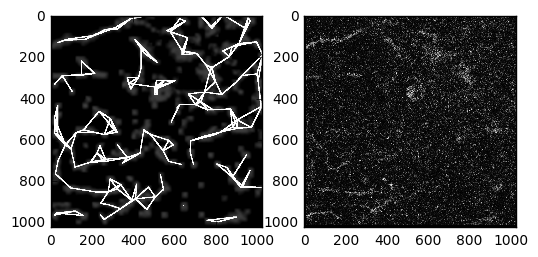

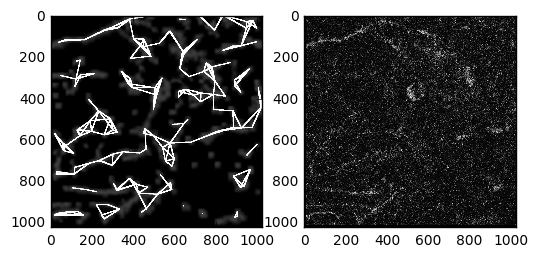

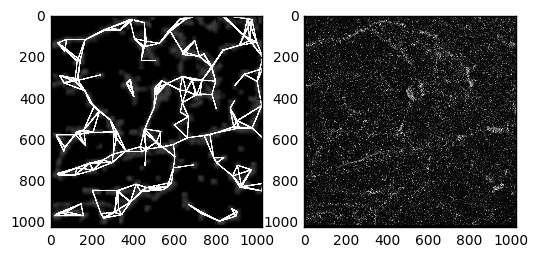

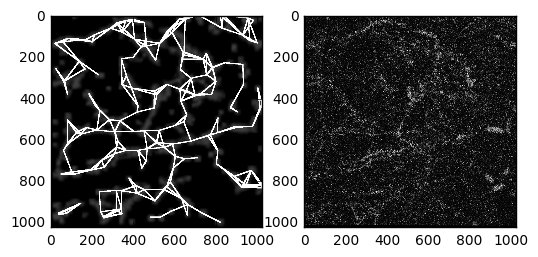

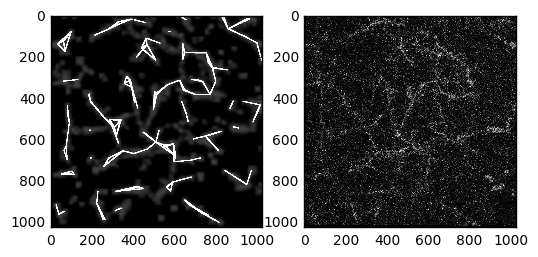

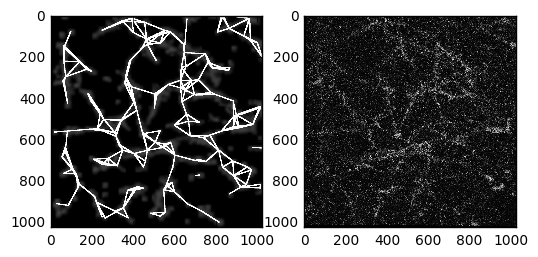

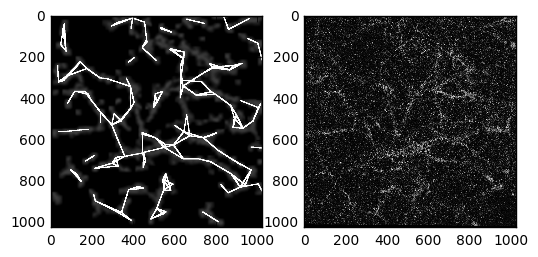

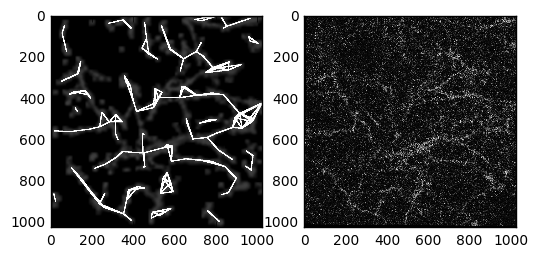

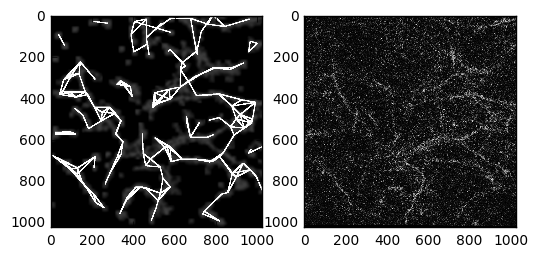

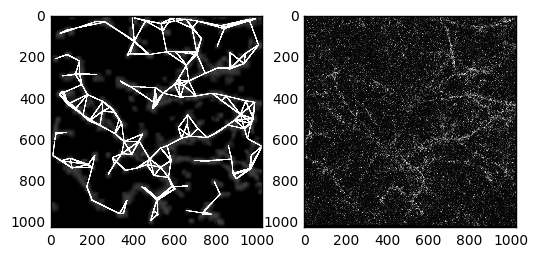

In [5]:
for i in range(10, 20):
    plt.subplot(121)
    plt.imshow(neuroGraphStack_0[i]._vis, cmap='gray')
    
    plt.subplot(122)
    plt.imshow(data_0[i]*100, cmap='gray')
    
    plt.show()

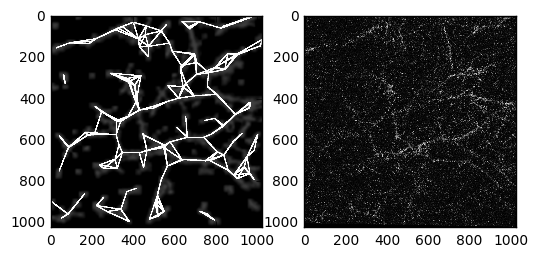

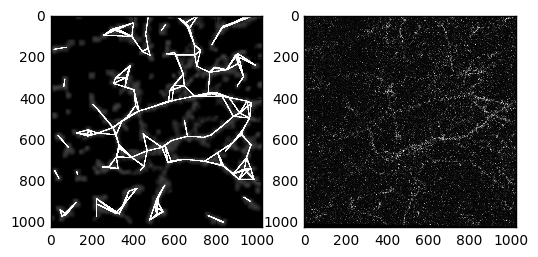

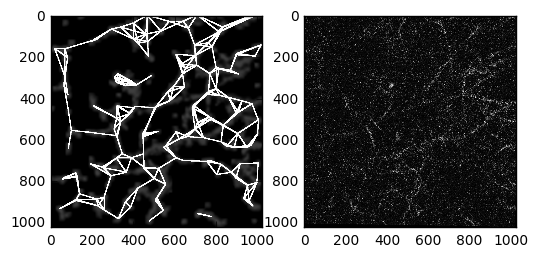

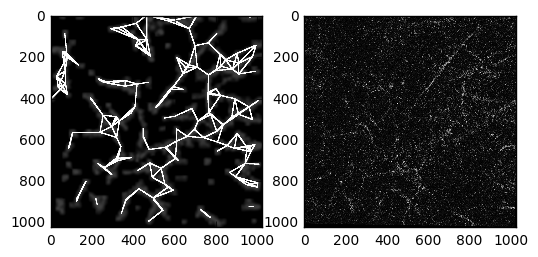

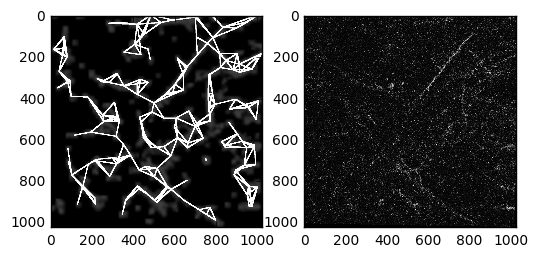

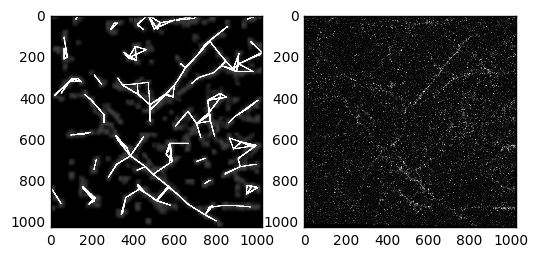

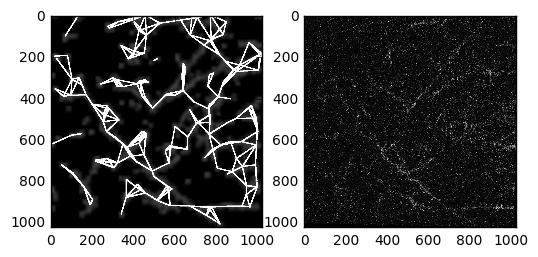

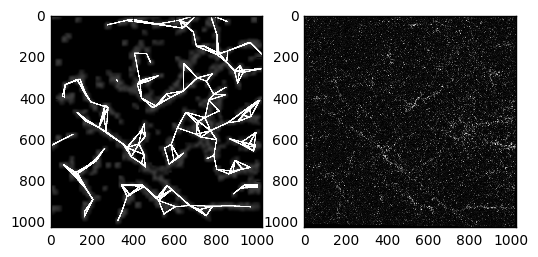

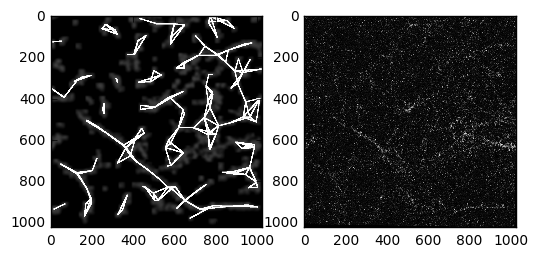

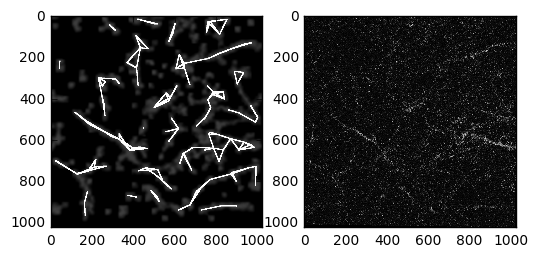

In [6]:
for i in range(10, 20):
    plt.subplot(121)
    plt.imshow(neuroGraphStack_1[i]._vis, cmap='gray')
    
    plt.subplot(122)
    plt.imshow(data_1[i]*100, cmap='gray')
    
    plt.show()

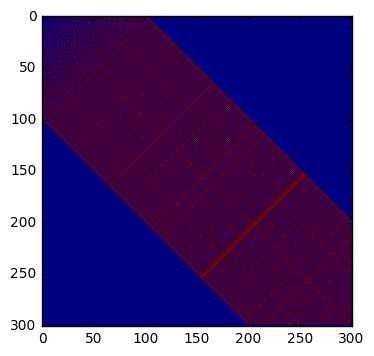

In [55]:
def generateTube(mat, x0, x1, y0, y1, thickness):
    x = np.linspace(x0, x1, int(np.sqrt(np.abs(x1**2 - x0**2))))
    y = np.linspace(y0, y1, int(np.sqrt(np.abs(y1**2 - y0**2))))
    coords = zip(x, y)
    perpSlope = -1.0*(x1 - x0)/(y1 - y0)
    numSamplePoints = thickness
    netCoords = []
    for coord in coords:
        xtop = int(math.floor(coord[0])) + numSamplePoints*perpSlope
        xbot = int(math.floor(coord[0])) - numSamplePoints*perpSlope
        xperp = np.linspace(xtop, xbot, int(np.sqrt(np.abs(xtop**2 - xbot**2))))
        ytop = int(math.floor(coord[1])) + numSamplePoints
        
        ybot = int(math.floor(coord[1])) - numSamplePoints
        yperp = np.linspace(ytop, ybot, int(np.sqrt(np.abs(ytop**2 - ybot**2))))
        coordsPerp = zip(xperp, yperp)
        
        finalCoordsPerp = []
        for coordPerp in coordsPerp:
            if coordPerp[0] > 0 and coordPerp[1] > 0 and coordPerp[0] < mat.shape[0] - 1 and coordPerp[1] < mat.shape[1] - 1:
                finalCoordsPerp.append(((int(math.floor(coordPerp[1]))), (int(math.floor(coordPerp[0])))))
        netCoords.append(finalCoordsPerp)
    return netCoords

mat = np.zeros((301,301))
netCoords = generateTube(mat, 0, 300, 0, 300, 50)
#finalCoordsPerp is what Brandon wants
for viewCoord in netCoords:
    for subCoord in viewCoord:
        mat[subCoord[0]][subCoord[1]] = 2
plt.imshow(mat)
plt.show()

In [8]:
testNeuroGraph = neuroGraphStack_1[15]

In [57]:
len(testNeuroGraph._edges)

293

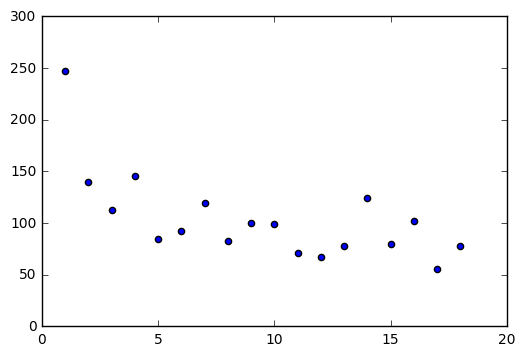

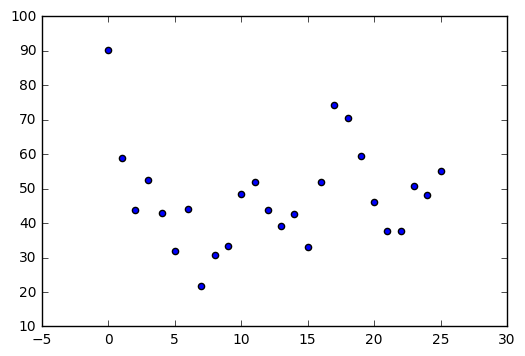

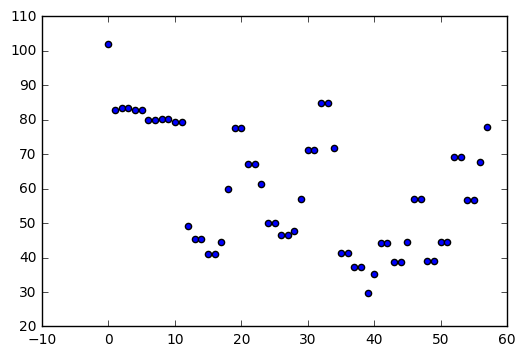

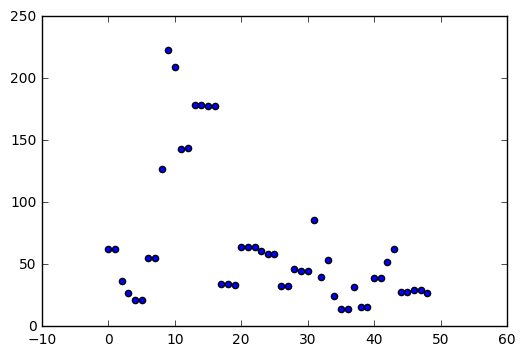

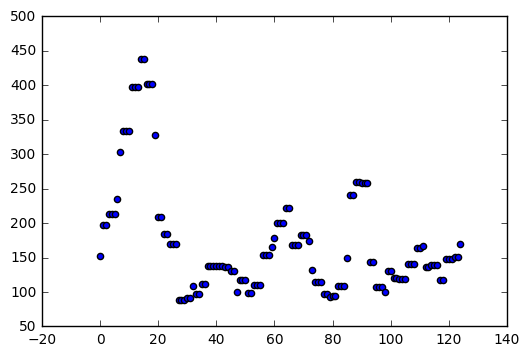

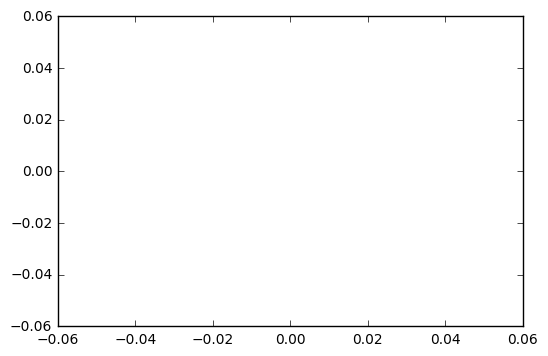

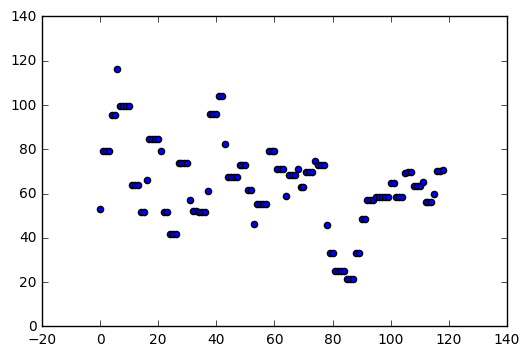

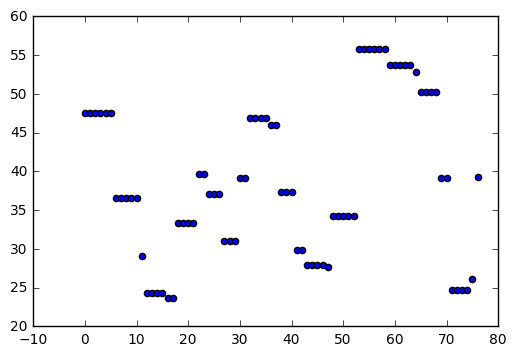

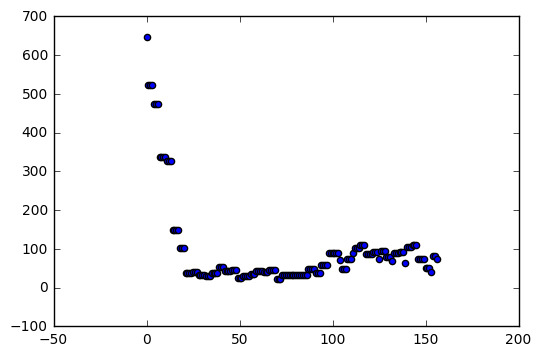

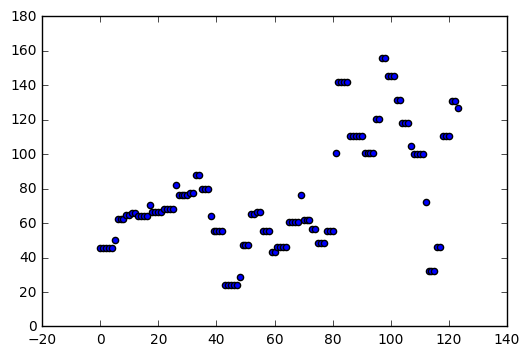

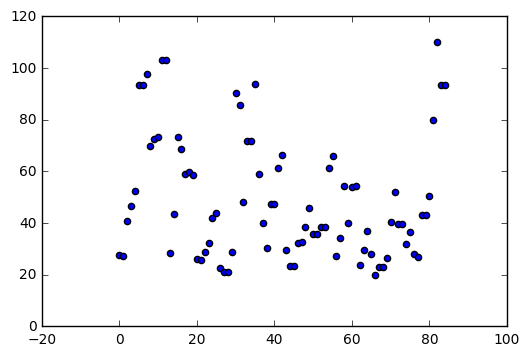

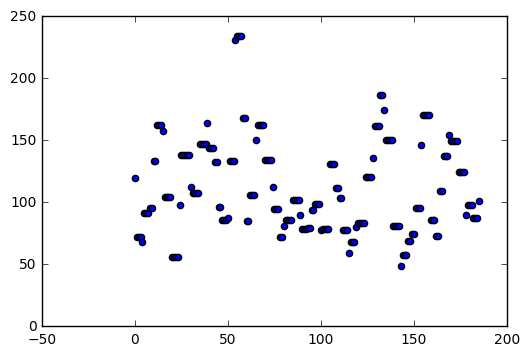

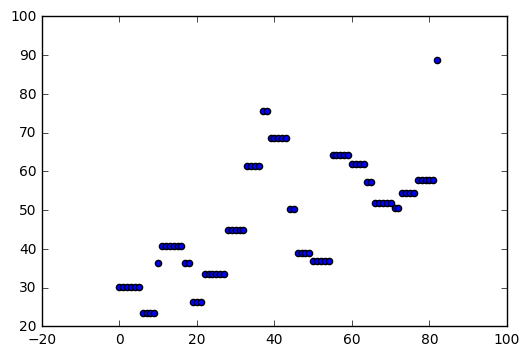

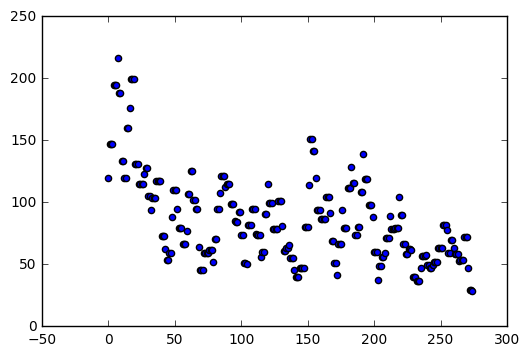

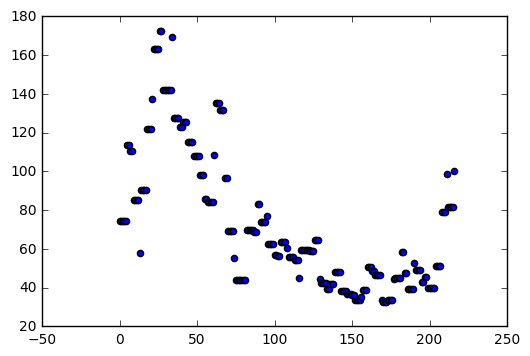

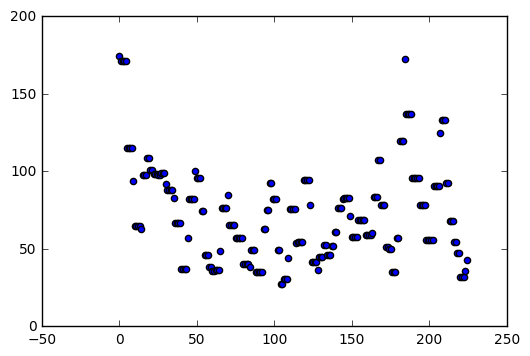

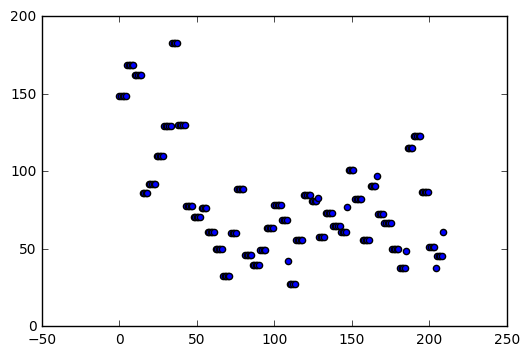

ZeroDivisionError: float division by zero

In [58]:
vis = np.zeros_like(testNeuroGraph._vis)
for i in range(0, len(testNeuroGraph._edges), 10):
    y, x = testNeuroGraph._edges[i]
    
    curROI = generateTube(vis, x[0], x[-1], y[0], y[-1], 10)

    ROIDist = []
    for orthagonal in curROI:
        orthagonalDist = []
        for elem in orthagonal:
            orthagonalDist.append(data_1[15][elem[0]][elem[1]])
        ROIDist.append(np.mean(orthagonalDist))
        
    for k in range(len(y)):
        vis[max(y[k]-3,0):min(y[k]+3, vis.shape[0]), max(x[k]-3, 0):min(x[k]+3, vis.shape[1])] = 255
    
    plt.figure()
    plt.scatter(range(len(ROIDist)), ROIDist)
    plt.show()

In [ ]:
plt.figure()
plt.imshow(vis, cmap='gray')
plt.show()

As expected, the distribution spikes when walking across the edge. Time to mark the elements that are sufficiently 'spiked' as synapse

In [24]:
def getSynapseROIs(neuroGraph):
    synapseROIs = []
    for i in range(0, len(testNeuroGraph._edges)):
        print i/float(len(testNeuroGraph._edges))
        y, x = testNeuroGraph._edges[i]
    
        start = time.time()
        curROI = generateTube(vis, x[0], y[0], x[-1], y[-1], 10)
        end = time.time()
        print 'Generating tube took: ', end - start
        
        start = time.time()
        ROIDist = []
        for orthagonal in curROI:
            orthagonalDist = []
            for elem in orthagonal:
                orthagonalDist.append(data_1[20][elem[0]][elem[1]])
            ROIDist.append(np.mean(orthagonalDist))
        
        end = time.time()
        print 'Generating dist took: ', end-start
        
        start = time.time()
        mu = np.average(ROIDist)
        sig = np.std(ROIDist)
        end = time.time()
        print'Numpy stats took: ', end - start
        
        start = time.time()
        z = [(elem - mu)/sig for elem in ROIDist]
        
        for i, elem in enumerate(z):
            if z >= 2:
                synapseROIs = synapseROIs + curROI[i]
        end = time.time()
        print 'List stats took: ', end - start
        
    return synapseROIs

In [25]:
synapseROIs = getSynapseROIs(testNeuroGraph)

0.0
Generating tube took:  0.0141429901123
Generating dist took:  0.004723072052
Numpy stats took:  8.89301300049e-05
List stats took:  0.00229096412659
0.00446428571429
Generating tube took:  0.0672678947449
Generating dist took:  0.0228440761566
Numpy stats took:  0.000108003616333
List stats took:  0.0721831321716
0.00892857142857
Generating tube took:  0.0792679786682
Generating dist took:  0.0299029350281
Numpy stats took:  0.000123977661133
List stats took:  0.273699045181
0.0133928571429
Generating tube took:  0.0886921882629
Generating dist took:  0.0259139537811
Numpy stats took:  0.000118017196655
List stats took:  0.632496833801
0.0178571428571
Generating tube took:  0.0908691883087
Generating dist took:  0.0256531238556
Numpy stats took:  0.000115871429443
List stats took:  0.985887050629
0.0223214285714
Generating tube took:  0.221467971802
Generating dist took:  0.0772049427032
Numpy stats took:  0.00018310546875
List stats took:  3.57307291031
0.0267857142857
Generating 

KeyboardInterrupt: 

In [59]:
def getSynapseROIs(neuroGraph):
    synapseROIs = []
    #for i in range(0, 1):
    for i in range(0, len(testNeuroGraph._edges)):
        print i/float(len(testNeuroGraph._edges))
        try:
            y, x = testNeuroGraph._edges[i]
    
            curROI = np.array(generateTube(vis, x[0], x[-1], y[0], y[-1], 20))
        
            ROIDist = []
            for orthagonal in curROI:
                orthagonalDist = []
                for elem in orthagonal:
                    #since will returns xy
                    orthagonalDist.append(data_1[20][elem[0]][elem[1]])
                ROIDist.append(np.mean(orthagonalDist))
    
            valid = np.array(np.where(zscore(ROIDist) > 1.5)[0])
            if len(valid) > 0:
                toAdd = np.concatenate([elem for elem in curROI[valid]])
                synapseROIs.append(toAdd)

        except:
            continue
    return synapseROIs

In [60]:
synapseROIs = getSynapseROIs(testNeuroGraph)

0.0
0.00341296928328
0.00682593856655
0.0102389078498
0.0136518771331
0.0170648464164
0.0204778156997
0.0238907849829
0.0273037542662
0.0307167235495
0.0341296928328
0.037542662116
0.0409556313993
0.0443686006826
0.0477815699659
0.0511945392491
0.0546075085324
0.0580204778157
0.061433447099
0.0648464163823
0.0682593856655
0.0716723549488
0.0750853242321
0.0784982935154
0.0819112627986
0.0853242320819
0.0887372013652
0.0921501706485
0.0955631399317
0.098976109215
0.102389078498
0.105802047782
0.109215017065


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater


0.112627986348
0.116040955631
0.119453924915
0.122866894198
0.126279863481
0.129692832765
0.133105802048
0.136518771331
0.139931740614
0.143344709898
0.146757679181
0.150170648464
0.153583617747
0.156996587031
0.160409556314
0.163822525597
0.167235494881
0.170648464164
0.174061433447
0.17747440273
0.180887372014
0.184300341297
0.18771331058
0.191126279863
0.194539249147
0.19795221843
0.201365187713
0.204778156997
0.20819112628
0.211604095563
0.215017064846
0.21843003413
0.221843003413
0.225255972696
0.22866894198
0.232081911263
0.235494880546
0.238907849829
0.242320819113
0.245733788396
0.249146757679
0.252559726962
0.255972696246
0.259385665529
0.262798634812
0.266211604096
0.269624573379
0.273037542662
0.276450511945
0.279863481229
0.283276450512
0.286689419795
0.290102389078
0.293515358362
0.296928327645
0.300341296928
0.303754266212
0.307167235495
0.310580204778
0.313993174061
0.317406143345
0.320819112628
0.324232081911
0.327645051195
0.331058020478
0.334470989761
0.337883959044
0

In [ ]:
roi = testNeuroGraph._vis.copy()
for orth in synapseROIs:
    for y, x in orth:
        roi[y][x] = 255
plt.imshow(roi, cmap='gray')
plt.show()

In [9]:
def generateTube(x0, x1, y0, y1, thickness, mat):
    x = np.linspace(x0, x1, int(np.sqrt(np.abs((x1 - x0)**2 + (y1 - y0)**2))))
    y = np.linspace(y0, y1, int(np.sqrt(np.abs((x1 - x0)**2 + (y1 - y0)**2))))
    coords = zip(x, y)
    
    perpSlope = None
    if y1-y0 == 0:
        perpSlope = 1000
    elif x1-x0 == 0:
        perpSlope == .0001
    else:
        perpSlope = -1.0*(x1 - x0)/(y1 - y0)

    numSamplePoints = thickness/2
    netCoords = []
    for coord in coords:
        xtop = coord[0] + numSamplePoints/np.sqrt(1 + perpSlope*perpSlope)
        xbot = coord[0] - numSamplePoints/np.sqrt(1 + perpSlope*perpSlope)
        ytop = coord[1] + perpSlope*numSamplePoints/np.sqrt(1 + perpSlope*perpSlope)
        ybot = coord[1] - perpSlope*numSamplePoints/np.sqrt(1 + perpSlope*perpSlope)
        xperp = np.linspace(xtop, xbot, int(np.sqrt(np.abs((xtop - xbot)**2 + (ytop - ybot)**2))))
        yperp = np.linspace(ytop, ybot, int(np.sqrt(np.abs((xtop - xbot)**2 + (ytop - ybot)**2))))
        coordsPerp = zip(xperp, yperp)
        finalCoordsPerp = []
        for coordPerp in coordsPerp:
            if coordPerp[0] > 0 and coordPerp[1] > 0 and coordPerp[0] < mat.shape[0] - 1 and coordPerp[1] < mat.shape[1] - 1:
                finalCoordsPerp.append(((int(math.floor(coordPerp[1]))), (int(math.floor(coordPerp[0])))))
        netCoords.append(finalCoordsPerp)
    return netCoords



In [10]:
def waveletSynapseROIs(neuroGraph):
    boostedImg, _ = ngl.boostDendrites(data_1[13:17], percentile=50)
    adaptiveImg = ngl.adaptiveThreshold(boostedImg, 32, 32)[2]
    plt.imshow(adaptiveImg, cmap='gray')
    plt.show()
    synapseROIs = []
    #for i in range(0, 1):
    for i in range(0, len(testNeuroGraph._edges)):
        print i/float(len(testNeuroGraph._edges))
        try:
            
            y, x = testNeuroGraph._edges[i]

            curROI = np.array(generateTube(x[0], x[-1], y[0], y[-1], 30, adaptiveImg))

            ROIDist = []
            ROIDistLedger = []
            for orthagonal in curROI:
                orthagonalDist = []
                orthagonalMaxLedger = []
                for elem in orthagonal:
                    #since will returns xy
                    orthagonalDist.append(adaptiveImg[elem[0]][elem[1]])
                    orthagonalMaxLedger.append((elem[0], elem[1]))
                ROIDist.append(np.max(orthagonalDist))
                ROIDistLedger.append(orthagonalMaxLedger[np.argmax(orthagonalDist)])

            valid = np.array(np.where(zscore(ROIDist) > 1)[0])


            '''
            valid = argrelmax(np.array(ROIDist))[0]
            if len(valid) > 0:
                toAdd = np.concatenate([elem for elem in curROI[valid]])
                synapseROIs.append(toAdd)


            if len(valid) > 0:
                toAdd = np.concatenate([elem for elem in curROI[valid]])
                synapseROIs.append(toAdd) 
            '''

            if len(valid) > 0:
                for idx in valid:
                    synapseROIs.append(ROIDistLedger[idx])
            else:
                print 'no maxima found!'

        except:
            print sys.exc_info()[0]

    return synapseROIs

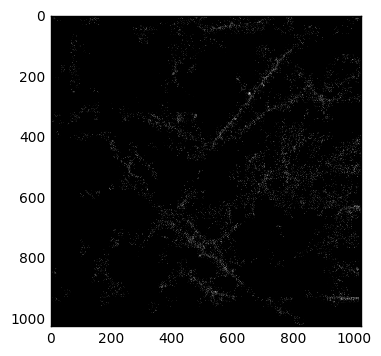

0.0
0.00296735905045
0.00593471810089
0.00890207715134
0.0118694362018
0.0148367952522
0.0178041543027
0.0207715133531
0.0237388724036
0.026706231454
0.0296735905045
0.0326409495549
0.0356083086053
0.0385756676558
0.0415430267062
0.0445103857567
0.0474777448071
0.0504451038576
0.053412462908
0.0563798219585
0.0593471810089
0.0623145400593
0.0652818991098
0.0682492581602
0.0712166172107
0.0741839762611
0.0771513353116
0.080118694362
0.0830860534125
0.0860534124629
0.0890207715134
0.0919881305638
no maxima found!
0.0949554896142
0.0979228486647
0.100890207715
0.103857566766
0.106824925816
<type 'exceptions.TypeError'>
0.109792284866
0.112759643917
0.115727002967
0.118694362018
0.121661721068
0.124629080119
0.127596439169
0.13056379822
0.13353115727
0.13649851632
0.139465875371
0.142433234421
0.145400593472
0.148367952522
0.151335311573
0.154302670623
0.157270029674
0.160237388724
no maxima found!
0.163204747774
0.166172106825
0.169139465875
0.172106824926
<type 'exceptions.TypeError'>
0.

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.646884272997
no maxima found!
0.649851632047
0.652818991098
0.655786350148
0.658753709199
0.661721068249
0.6646884273
0.66765578635
0.670623145401
0.673590504451
0.676557863501
0.679525222552
0.682492581602
0.685459940653
0.688427299703
0.691394658754
0.694362017804
0.697329376855
0.700296735905
0.703264094955
0.706231454006
0.709198813056
0.712166172107
0.715133531157
0.718100890208
0.721068249258
0.724035608309
0.727002967359
0.729970326409
0.73293768546
0.73590504451
0.738872403561
0.741839762611
0.744807121662
0.747774480712
0.750741839763
0.753709198813
0.756676557864
0.759643916914
0.762611275964
0.765578635015
0.768545994065
0.771513353116
0.774480712166
0.777448071217
0.780415430267
0.783382789318
0.786350148368
0.789317507418
no maxima found!
0.792284866469
0.795252225519
0.79821958457
0.80118694362
0.804154302671
0.807121661721
0.810089020772
0.813056379822
0.816023738872
0.818991097923
0.821958456973
0.824925816024
0.827893175074
0.830860534125
0.833827893175
0.83679525222

In [11]:
synapseROIs = waveletSynapseROIs(testNeuroGraph)

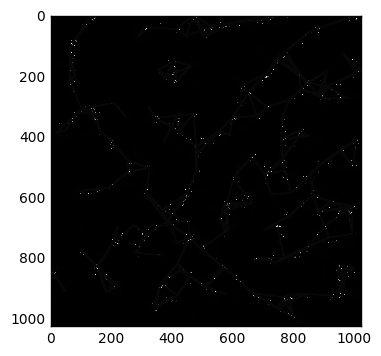

In [12]:
roi = testNeuroGraph._vis.copy()
#for orth in synapseROIs:
for i in range(1):
    for y, x in synapseROIs: # was orth
        roi[y][x] = 9001
plt.imshow(roi,  cmap='gray')
plt.show()

(60, 1024, 1024)


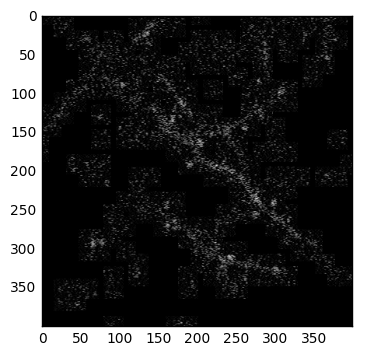

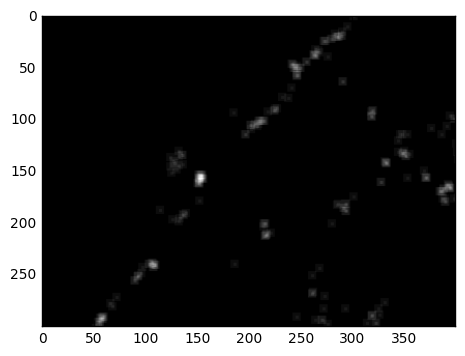

In [17]:
data_1_b, _ = ngl.boostDendrites(data_1)
print data_1_b.shape
zoom = data_1_b[15, 600:1000, 300:700]
plt.imshow(zoom, cmap='gray')
plt.show()


roi = np.zeros_like(data_1[15].copy())
#for orth in synapseROIs:
for i in range(1):
    for y, x in synapseROIs: # was orth
        roi[y][x] = 300
        
kernel_a = np.ones((8, 8))
kernel_b = np.ones((3, 3))
roi_c = np.add(convolve(roi, kernel_a), convolve(roi, kernel_b)) 
plt.imshow(roi_c[100:400, 500:900], cmap='gray')
#plt.imshow(roi, cmap='gray')
plt.show()

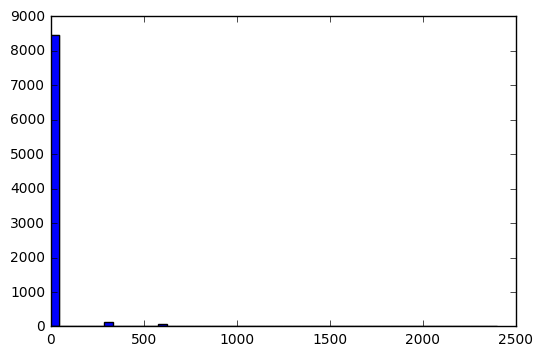

In [69]:
dat = np.extract(roi_c[600:1000, 300:700] > 0, roi_c)
plt.hist(dat, bins=50)
plt.show()
